In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import localtime
import json
import pprint 

# Import API key
import api_keys
api_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Create dataframe for city weather data
city_weather_df = pd.DataFrame({"City": cities})

# Add new columns to hold weather data
city_weather_df["Cloudiness"] = ""
city_weather_df["Country"] = ""
city_weather_df["Date"] = ""
city_weather_df["Humidity"] = ""
city_weather_df["Lat"] = ""
city_weather_df["Lng"] = ""
city_weather_df["Max Temp"] = ""
city_weather_df["Wind Speed"] = ""

city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
620,takoradi,,,,,,,,
621,viedma,,,,,,,,
622,domoni,,,,,,,,
623,haines junction,,,,,,,,
624,tolmachevo,,,,,,,,


In [75]:
#Preview Json file
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
# base_url = url + city
# response = requests.get(base_url).json()
# response

## Perform API Calls

In [87]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="


print("Begin Weather Data Retrieval      ")
print("----------------------------------")

# Iterate through rows to get weather data
for index, row in city_weather_df.iterrows():
    city = row["City"]
    base_url = url + city
    
    # Make API Requests
    response = requests.get(base_url).json()
    
    # Use try/except to skip over cities with no data
    try:
        print(f"Processing Record # {index+1} | {city}")
        print(base_url)
        city_weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_weather_df.loc[index, "Country"] = response["sys"]["country"]
        city_weather_df.loc[index, "Date"] = response["dt"]
        city_weather_df.loc[index, "Lat"]= response["coord"]["lat"]
        city_weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        city_weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        city_weather_df.loc[index, "Max Temp"] = response["main"]["temp"]
        city_weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    
    except:
        print("Skipping...Data Not Found For " + city)
        
        # Drop rows missing data
        city_weather_df.drop(labels=index, inplace=True)

# Print Data loading Complete statement     
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
           

Begin Weather Data Retrieval      
----------------------------------
Processing Record # 1 | cochrane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=cochrane
Processing Record # 2 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=barcelos
Processing Record # 3 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=porto novo
Processing Record # 4 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=busselton
Processing Record # 5 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=hobart
Processing Record # 6 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=illoqqortoormiut
Skipping...Data Not Found For illoqqortoor

Processing Record # 55 | nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=nelson bay
Processing Record # 56 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=esperance
Processing Record # 57 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=olafsvik
Skipping...Data Not Found For olafsvik
Processing Record # 58 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=airai
Processing Record # 59 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=georgetown
Processing Record # 60 | rondonopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=rondonopolis
Processing Record # 61 | houma
http://api.openweathermap.org/data/2.5/wea

Processing Record # 110 | kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kodinsk
Processing Record # 111 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=port alfred
Processing Record # 112 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=new norfolk
Processing Record # 113 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=sabang
Processing Record # 114 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=amderma
Skipping...Data Not Found For amderma
Processing Record # 115 | zabaykalsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=zabaykalsk
Processing Record # 116 | rio gallegos
http://api.openweathermap.org/dat

Processing Record # 165 | pizarro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=pizarro
Processing Record # 166 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=barentsburg
Skipping...Data Not Found For barentsburg
Processing Record # 167 | salina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=salina
Processing Record # 168 | chestermere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=chestermere
Processing Record # 169 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=luderitz
Processing Record # 170 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tessalit
Processing Record # 171 | yangambi
http://api.openweathermap.org/data/

Processing Record # 220 | galesong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=galesong
Processing Record # 221 | darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=darhan
Processing Record # 222 | byron bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=byron bay
Processing Record # 223 | lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=lethem
Processing Record # 224 | frontignan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=frontignan
Processing Record # 225 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=khandyga
Processing Record # 226 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7

Processing Record # 274 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=okhotsk
Processing Record # 275 | songkhla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=songkhla
Processing Record # 276 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=skibbereen
Processing Record # 277 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=richards bay
Processing Record # 278 | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=vuktyl
Processing Record # 279 | astoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=astoria
Processing Record # 280 | balikpapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d

Processing Record # 328 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=broome
Processing Record # 329 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=longyearbyen
Processing Record # 330 | severo-yeniseyskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=severo-yeniseyskiy
Processing Record # 331 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=paamiut
Processing Record # 332 | upornaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=upornaya
Processing Record # 333 | dwarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=dwarka
Processing Record # 334 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record # 382 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=coihaique
Processing Record # 383 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=chuy
Processing Record # 384 | taltal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=taltal
Processing Record # 385 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=namibe
Processing Record # 386 | upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=upata
Processing Record # 387 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=quatre cocos
Processing Record # 388 | aqtobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541e

Processing Record # 436 | hangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=hangu
Processing Record # 437 | maradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=maradi
Processing Record # 438 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=seoul
Processing Record # 439 | boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=boende
Processing Record # 440 | torres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=torres
Processing Record # 441 | marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=marsabit
Processing Record # 442 | palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=palana

Processing Record # 491 | estevan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=estevan
Processing Record # 492 | tabalosos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tabalosos
Processing Record # 493 | antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=antalaha
Processing Record # 494 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kununurra
Processing Record # 495 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=attawapiskat
Skipping...Data Not Found For attawapiskat
Processing Record # 496 | kaffrine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kaffrine
Processing Record # 497 | beohari
http://api.openweathermap.org/d

Processing Record # 545 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=acapulco
Processing Record # 546 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=avera
Processing Record # 547 | magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=magadan
Processing Record # 548 | purpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=purpe
Processing Record # 549 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=kloulklubed
Processing Record # 550 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=muros
Processing Record # 551 | marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541

Processing Record # 601 | la paz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=la paz
Processing Record # 602 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=tazovskiy
Processing Record # 603 | yazman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=yazman
Processing Record # 604 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=mareeba
Processing Record # 605 | toyota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=toyota
Processing Record # 606 | panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd541ee15&q=panzhihua
Processing Record # 607 | fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3140a664d788ac21b79f7d8bd5

In [88]:
# Preview appended weather dataframe
city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
619,dawson,1,US,1533522900,88,39.85,-89.46,78.46,8.41
620,takoradi,32,GH,1533524469,100,4.89,-1.75,75.09,8.63
621,viedma,20,AR,1533524469,78,-40.81,-62.99,43.41,2.82
623,haines junction,12,CA,1533524470,53,60.75,-137.51,60.87,3.6
624,tolmachevo,8,RU,1533522600,93,55.36,38.22,59.79,4.47


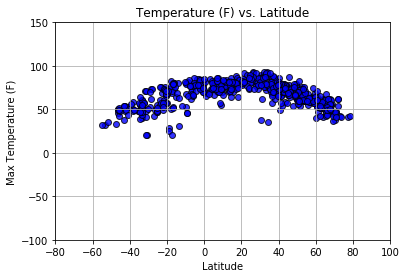

In [93]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], c="blue", edgecolor="black", marker="o", alpha=0.8)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(-100, 150)

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.grid()
# #plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()